### <center> COMBINAÇÃO DE DADOS (<b>Aglutinação de Dataframes</b>) </center>

##### <b>Objetivo:</b> Estudar a relação entre as notas do ENEM 2021 em cada município brasileiro (Disciplinas + Redação) e o IDHM (Índice de Desenvolvimento Humano por Município)

##### <b>IDHM Brasileiro de 2010:</b> https://www.kaggle.com/datasets/BrasilComCenso/atlas-idhm-brasil-1991-2000-e-2010-lat-e-long
----
 

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# IMPORTANDO O DATASET: MICRODADDOS ENEM 2021
#---------------------------------------------
microdados_ENEM_path = 'C:/Users/Usuário/Desktop/DATA SCIENCE - PROJETOS E APRENDIZAGEM/MICRODADOS_ENEM_2021.csv'
ENEM_dataset = pd.read_csv(microdados_ENEM_path, sep = ';', encoding = 'iso8859_10')

In [5]:
df_ENEM_2021 = pd.DataFrame(ENEM_dataset)
#----------------------------------------
# Informações:
#df_ENEM_2021.head(10)
#df_ENEM_2021.info()
#df_ENEM_2021.describe()
print("Dimensões: ", df_ENEM_2021.shape, "\nParâmetros:")
df_ENEM_2021.columns

Dimensões:  (3389832, 76) 
Parâmetros:


Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [6]:
# DATAFRAME COM PARÂMETROS SELECIONADOS: NOTAS E DADOS DEMOGRÁFICOS DOS INSCRITOS
#--------------------------------------------------------------------------------
df_notas_dadosDemograficos = df_ENEM_2021.filter(items = ['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [7]:
df_notas_dadosDemograficos.shape
df_notas_dadosDemograficos.columns

Index(['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO'],
      dtype='object')

In [8]:
# DATAFRAME COM NOTAS AGRUPADAS POR MUNICÍPIO: groupby(...).mean
#--------------------------------------------------------------------------------

# Para gerar um dataframe contendo uma nova coluna de índice -> método GROUPBY ---> as_index = False
df_medias_municipios = df_notas_dadosDemograficos.groupby(['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC'], as_index = False).mean()
#--------------------------------------------------------------------------------

# Dataframe novo sem coluna de índice gerada ---> as_index = True (default)
#df_medias_municipios = df_notas_dadosDemograficos.groupby(['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC']).mean()


#### <i>OBS:</i> A operação no método GROUPBY (média, mediana, soma, etc.) é aplicada a cada parâmetro de dados numéricos, se esses não forem especificados nos argumentos do método.

In [9]:
df_medias_municipios

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015.0,Alta Floresta D'Oeste,11.0,RO,497.721951,504.034091,491.079545,543.558537,621.363636
1,1100023.0,Ariquemes,11.0,RO,474.773986,495.727950,484.710248,518.811149,584.534161
2,1100031.0,Cabixi,11.0,RO,477.266667,486.071429,447.628571,522.883333,471.428571
3,1100049.0,Cacoal,11.0,RO,489.744000,505.006061,490.991919,533.458933,611.717172
4,1100056.0,Cerejeiras,11.0,RO,479.268750,477.045714,454.722857,480.696875,576.571429
...,...,...,...,...,...,...,...,...,...
5533,5222005.0,Vianópolis,52.0,GO,449.954054,479.917073,473.014634,516.186486,553.658537
5534,5222054.0,Vicentinópolis,52.0,GO,450.285714,464.383333,457.593333,504.085714,552.000000
5535,5222203.0,Vila Boa,52.0,GO,431.645455,443.025000,426.491667,445.027273,420.000000
5536,5222302.0,Vila Propício,52.0,GO,432.055556,417.394737,428.821053,460.816667,444.210526


### Para exportar o novo dataframe gerado para um arquivo <b>CSV</b>:

##### <i>OBS:</i> O arquivo é salvo no mesmo diretório do jupyter notebook!

##### <i>OBS 2:</i> Argumentos do método <i>dataframe</i><b>.to_csv()</b> -> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

##### <i>OBS 3:</i> Um dos argumentos é df.to_csv(<b>columns = </b>['...', ..., '...']), o qual nos ajuda a filtrar os parâmetros que desejamos salvar no novo arquivo CSV

In [56]:
df_medias_municipios.to_csv('Medias_ENEM_2021_Municipio.csv')

-------

In [85]:
# IMPORTANDO DATASET: IDHM BRASIL 2010
#-------------------------------------
idhm_2010 = pd.read_csv('IDHM Brasil 2010.csv', sep = ',')

In [99]:
df_IDHM_2010 = pd.DataFrame(idhm_2010)
#-------------------------------------
df_IDHM_2010.info()
#print('______________________________________________________\n-> Estatística Descritiva (IDHM Brasil 2010):')
#df_IDHM_2010.describe(include = 'all')
df_IDHM_2010.columns.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Columns: 240 entries, ANO to IDHM_R
dtypes: float64(170), int64(68), object(2)
memory usage: 30.6+ MB


array(['ANO', 'UF', 'Codmun6', 'Codmun7', 'Município', 'LONG', 'LAT',
       'Alt', 'ESPVIDA', 'FECTOT', 'MORT1', 'MORT5', 'RAZDEP', 'SOBRE40',
       'SOBRE60', 'T_ENV', 'E_ANOSESTUDO', 'T_ANALF11A14', 'T_ANALF15A17',
       'T_ANALF15M', 'T_ANALF18A24', 'T_ANALF18M', 'T_ANALF25A29',
       'T_ANALF25M', 'T_ATRASO_0_BASICO', 'T_ATRASO_0_FUND',
       'T_ATRASO_0_MED', 'T_ATRASO_1_BASICO', 'T_ATRASO_1_FUND',
       'T_ATRASO_1_MED', 'T_ATRASO_2_BASICO', 'T_ATRASO_2_FUND',
       'T_ATRASO_2_MED', 'T_FBBAS', 'T_FBFUND', 'T_FBMED', 'T_FBPRE',
       'T_FBSUPER', 'T_FLBAS', 'T_FLFUND', 'T_FLMED', 'T_FLPRE',
       'T_FLSUPER', 'T_FREQ0A3', 'T_FREQ11A14', 'T_FREQ15A17',
       'T_FREQ18A24', 'T_FREQ25A29', 'T_FREQ4A5', 'T_FREQ4A6',
       'T_FREQ5A6', 'T_FREQ6', 'T_FREQ6A14', 'T_FREQ6A17',
       'T_FREQFUND1517', 'T_FREQFUND1824', 'T_FREQFUND45',
       'T_FREQMED1824', 'T_FREQMED614', 'T_FREQSUPER1517', 'T_FUND11A13',
       'T_FUND12A14', 'T_FUND15A17', 'T_FUND16A18', 'T_FUND18A24',
   

In [63]:
# IMPORTANDO DATASET (FORMATO CSV) GERADO ANTERIORMENTE: Medias_ENEM_2021_Municipio
#----------------------------------------------------------------------------------
enem_medias_municipio_CSV = pd.read_csv('Medias_ENEM_2021_Municipio.csv', sep = ',', index_col = 0)

# sep = ';' ---> Separador default do método pd.read_csv()
# index_col = 0 ---> Determina que a coluna índice do dataframe é a primeira coluna da tabela CSV aberta!

In [64]:
df_medias_municipios = pd.DataFrame(enem_medias_municipio_CSV)
#-------------------------------------------------------------
#df_medias_municipios.head(10)
df_medias_municipios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538 entries, 0 to 5537
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_MUNICIPIO_ESC  5538 non-null   float64
 1   NO_MUNICIPIO_ESC  5538 non-null   object 
 2   CO_UF_ESC         5538 non-null   float64
 3   SG_UF_ESC         5538 non-null   object 
 4   NU_NOTA_CN        5479 non-null   float64
 5   NU_NOTA_CH        5486 non-null   float64
 6   NU_NOTA_LC        5486 non-null   float64
 7   NU_NOTA_MT        5479 non-null   float64
 8   NU_NOTA_REDACAO   5486 non-null   float64
dtypes: float64(7), object(2)
memory usage: 432.7+ KB


-------------
### <b>Aglutinação de Dataframes!</b>
#### Método <i>dataframe</i>.<b>merge(...)</b>

##### Documentação: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [100]:
df_IDHM_2010 = df_IDHM_2010[['ANO', 'UF', 'Codmun6', 'Codmun7', 'Município', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']]
#df_IDHM_2010.shape
df_IDHM_2010.head()

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,RONDÔNIA,110001,1100015,ALTA FLORESTA D'OESTE,0.329,0.112,0.617,0.516
1,1991,RONDÔNIA,110002,1100023,ARIQUEMES,0.432,0.199,0.684,0.593
2,1991,RONDÔNIA,110003,1100031,CABIXI,0.309,0.108,0.636,0.430
3,1991,RONDÔNIA,110004,1100049,CACOAL,0.407,0.171,0.667,0.593
4,1991,RONDÔNIA,110005,1100056,CEREJEIRAS,0.386,0.167,0.629,0.547


In [102]:
# Pegando só os dados do IDHM do ano de 2010
#-------------------------------------------
df_IDHM_2010 = df_IDHM_2010[df_IDHM_2010['ANO'] == 2010]
df_IDHM_2010.head()

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
11130,2010,RONDÔNIA,110001,1100015,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
11131,2010,RONDÔNIA,110002,1100023,ARIQUEMES,0.702,0.600,0.806,0.716
11132,2010,RONDÔNIA,110003,1100031,CABIXI,0.650,0.559,0.757,0.650
11133,2010,RONDÔNIA,110004,1100049,CACOAL,0.718,0.620,0.821,0.727
11134,2010,RONDÔNIA,110005,1100056,CEREJEIRAS,0.692,0.602,0.799,0.688


In [88]:
#df_medias_municipios.shape
df_medias_municipios.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015.0,Alta Floresta D'Oeste,11.0,RO,497.721951,504.034091,491.079545,543.558537,621.363636
1,1100023.0,Ariquemes,11.0,RO,474.773986,495.727950,484.710248,518.811149,584.534161
2,1100031.0,Cabixi,11.0,RO,477.266667,486.071429,447.628571,522.883333,471.428571
3,1100049.0,Cacoal,11.0,RO,489.744000,505.006061,490.991919,533.458933,611.717172
4,1100056.0,Cerejeiras,11.0,RO,479.268750,477.045714,454.722857,480.696875,576.571429


##### <i>OBS:</i> A coluna "Codmun7" do <i><b>df_IDHM_2010</b></i> contém os mesmos valores encontrados na coluna "CO_MUNICIPIO_ESC" do <i><b>df_medias_municipios</b></i>

In [103]:
df_IDHM_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5565 entries, 11130 to 16694
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ANO        5565 non-null   int64  
 1   UF         5565 non-null   object 
 2   Codmun6    5565 non-null   int64  
 3   Codmun7    5565 non-null   int64  
 4   Município  5565 non-null   object 
 5   IDHM       5565 non-null   float64
 6   IDHM_E     5565 non-null   float64
 7   IDHM_L     5565 non-null   float64
 8   IDHM_R     5565 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 434.8+ KB


In [104]:
df_medias_municipios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538 entries, 0 to 5537
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_MUNICIPIO_ESC  5538 non-null   float64
 1   NO_MUNICIPIO_ESC  5538 non-null   object 
 2   CO_UF_ESC         5538 non-null   float64
 3   SG_UF_ESC         5538 non-null   object 
 4   NU_NOTA_CN        5479 non-null   float64
 5   NU_NOTA_CH        5486 non-null   float64
 6   NU_NOTA_LC        5486 non-null   float64
 7   NU_NOTA_MT        5479 non-null   float64
 8   NU_NOTA_REDACAO   5486 non-null   float64
dtypes: float64(7), object(2)
memory usage: 432.7+ KB


#### <i>OBS 2:</i> Sempre conferir os tipos de objetos das colunas correspondentes na aglutinação!

____
#### Método de Aglutinação de Dataframes:
##### <i>df_novo</i> = pd<b>.merge(</b><i>dataframe_1</i><b>,</b> <i>dataframe_2</i><b>, how</b> = <i>'left'</i> | <i>'right'</i><b>, left_on</b> = [<i>'coluna_DF_1'</i>]<b>, right_on</b> = [<i>'coluna_DF_2'</i>]<b>)</b>

In [107]:
# dataframe_1 = df_medias_municipios
# dataframe_2 = df_IDHM_2010
# how = 'left' ---> Qual dataframe será usado como referência (BASE) da aglutinação 
# |---> 'left' = dataframe passado como PRIMEIRO argumento do método pd.merge() ---> 'df_medias_municipios'
# |---> 'right' = dataframe passado como SEGUNDO argumento ---> 'df_IDHM_2010'
# left_on = coluna de correspondência em 'df_medias_municipios'
# right_on = coluna de correspondência de 'df_IDHM_2010'
#-------------------------------------------------------

DF_ENEM_mediasIDHM = pd.merge(df_medias_municipios, df_IDHM_2010, how = 'left', left_on = ['CO_MUNICIPIO_ESC'], right_on = ['Codmun7'])

#-----------------------
DF_ENEM_mediasIDHM.shape
DF_ENEM_mediasIDHM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538 entries, 0 to 5537
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CO_MUNICIPIO_ESC  5538 non-null   float64
 1   NO_MUNICIPIO_ESC  5538 non-null   object 
 2   CO_UF_ESC         5538 non-null   float64
 3   SG_UF_ESC         5538 non-null   object 
 4   NU_NOTA_CN        5479 non-null   float64
 5   NU_NOTA_CH        5486 non-null   float64
 6   NU_NOTA_LC        5486 non-null   float64
 7   NU_NOTA_MT        5479 non-null   float64
 8   NU_NOTA_REDACAO   5486 non-null   float64
 9   ANO               5533 non-null   float64
 10  UF                5533 non-null   object 
 11  Codmun6           5533 non-null   float64
 12  Codmun7           5533 non-null   float64
 13  Município         5533 non-null   object 
 14  IDHM              5533 non-null   float64
 15  IDHM_E            5533 non-null   float64
 16  IDHM_L            5533 non-null   float64


In [109]:
DF_ENEM_mediasIDHM.head()

,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015.0,Alta Floresta D'Oeste,11.0,RO,497.721951,504.034091,491.079545,543.558537,621.363636,2010.0,RONDÔNIA,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,1100023.0,Ariquemes,11.0,RO,474.773986,495.727950,484.710248,518.811149,584.534161,2010.0,RONDÔNIA,110002.0,1100023.0,ARIQUEMES,0.702,0.600,0.806,0.716
2,1100031.0,Cabixi,11.0,RO,477.266667,486.071429,447.628571,522.883333,471.428571,2010.0,RONDÔNIA,110003.0,1100031.0,CABIXI,0.650,0.559,0.757,0.650
3,1100049.0,Cacoal,11.0,RO,489.744000,505.006061,490.991919,533.458933,611.717172,2010.0,RONDÔNIA,110004.0,1100049.0,CACOAL,0.718,0.620,0.821,0.727
4,1100056.0,Cerejeiras,11.0,RO,479.268750,477.045714,454.722857,480.696875,576.571429,2010.0,RONDÔNIA,110005.0,1100056.0,CEREJEIRAS,0.692,0.602,0.799,0.688


<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='IDHM'>

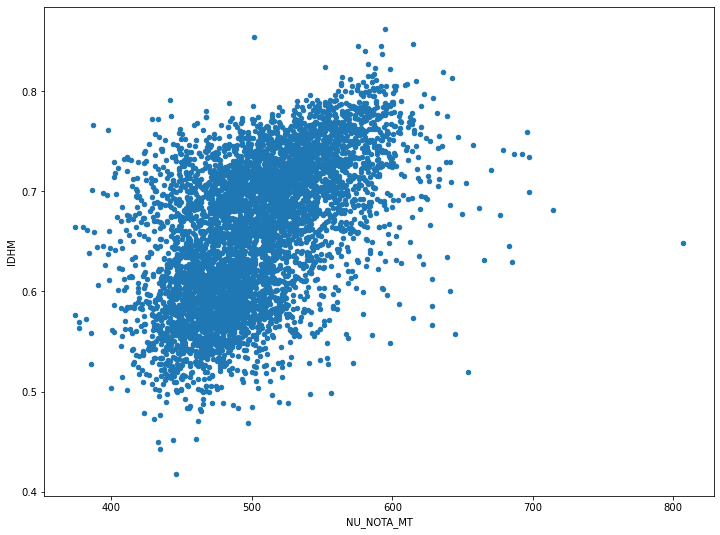

In [111]:
# CORRELAÇÃO ENTRE NOTA MÉDIA DE MATEMÁTICA EM CADA MUNICÍPIO E SEU IDHM
#-----------------------------------------------------------------------
DF_ENEM_mediasIDHM.plot.scatter('NU_NOTA_MT', 'IDHM', figsize = (12, 9))

In [112]:
df_ENEM_IDHM_dadosNumericos = DF_ENEM_mediasIDHM.filter(items = ['CO_MUNICIPIO_ESC', 'SG_UF_ESC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R'])

In [113]:
df_ENEM_IDHM_dadosNumericos.head(10)

,CO_MUNICIPIO_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015.0,RO,497.721951,504.034091,491.079545,543.558537,621.363636,0.641,0.526,0.763,0.657
1,1100023.0,RO,474.773986,495.727950,484.710248,518.811149,584.534161,0.702,0.600,0.806,0.716
2,1100031.0,RO,477.266667,486.071429,447.628571,522.883333,471.428571,0.650,0.559,0.757,0.650
3,1100049.0,RO,489.744000,505.006061,490.991919,533.458933,611.717172,0.718,0.620,0.821,0.727
4,1100056.0,RO,479.268750,477.045714,454.722857,480.696875,576.571429,0.692,0.602,0.799,0.688
5,1100064.0,RO,479.886000,512.286275,494.092157,539.089000,626.078431,0.685,0.584,0.814,0.676
6,1100072.0,RO,439.184615,466.414286,432.535714,445.276923,577.142857,0.613,0.473,0.774,0.630
7,1100080.0,RO,438.418182,465.692105,451.828947,478.290909,492.105263,0.611,0.493,0.751,0.616
8,1100098.0,RO,461.717241,469.654348,466.064130,502.457471,548.695652,0.672,0.536,0.819,0.691
9,1100106.0,RO,451.467665,467.282011,464.684127,485.638323,470.687831,0.657,0.519,0.823,0.663


In [114]:
df_ENEM_IDHM_dadosNumericos[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']].corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,IDHM,IDHM_E,IDHM_L,IDHM_R
NU_NOTA_CN,1.000000,0.760551,0.755612,0.752942,0.583425,0.516567,0.448522,0.469294,0.537798
NU_NOTA_CH,0.760551,1.000000,0.831779,0.745841,0.621975,0.509887,0.447820,0.458983,0.525989
NU_NOTA_LC,0.755612,0.831779,1.000000,0.771994,0.630062,0.542929,0.489892,0.477289,0.546601
NU_NOTA_MT,0.752942,0.745841,0.771994,1.000000,0.584799,0.535808,0.477187,0.474458,0.547396
NU_NOTA_REDACAO,0.583425,0.621975,0.630062,0.584799,1.000000,0.290195,0.249791,0.247402,0.311992
IDHM,0.516567,0.509887,0.542929,0.535808,0.290195,1.000000,0.950954,0.852447,0.948482
IDHM_E,0.448522,0.447820,0.489892,0.477187,0.249791,0.950954,1.000000,0.705004,0.820047
IDHM_L,0.469294,0.458983,0.477289,0.474458,0.247402,0.852447,0.705004,1.000000,0.834208
IDHM_R,0.537798,0.525989,0.546601,0.547396,0.311992,0.948482,0.820047,0.834208,1.000000
